#  Preparación del DataSet con las medidas y variables para todos los análisis

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random

In [15]:
pd.get_option("display.max_columns")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_columns", 20)
#pd.get_option("display.max_columns")

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [17]:
data_cuenta= pd.read_csv('../Datos_2740776.csv',sep=';', header = 0)
data_nodo= pd.read_csv('../DAta_final_Nodo.csv',sep=';', header = 0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
data_cuenta[['COD_NODO']].isnull().sum()

COD_NODO    0
dtype: int64

In [19]:
data_nodo[['NODO']].isnull().sum()

NODO    0
dtype: int64

In [20]:
#quitar fecha null

In [21]:
data_cuenta=data_cuenta[data_cuenta['fecha'].notnull()]

In [22]:
data_cuenta.shape

(2740775, 36)

## EXPLORACION

In [23]:
data_cuenta.columns

Index(['CUENTA', 'COD_SERVICIO', 'Tipo_Servicio', 'COD_NODO', 'ESTRATO',
       'CARTERA', 'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO',
       'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR',
       'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'OTROS', 'Total_Bajas', 'MES',
       'fecha', 'CHURN_TEMPRANO', 'INVOLUNTARIO', 'VOLUNTARIO', 'TIPO_RAZON',
       'MESES_ACTIVO', 'CANTIDAD_LLAMADAS', 'CANTIDAD_ADMIN',
       'CANTIDAD_TECNICO', 'CAMPANA_HBO', 'CAMPANA_FOX', 'CAMPANA_ADULTO',
       'CAMPANA_EQUIPOS_ADIC', 'CAMPANA_ULTRAWIFI', 'CAMPANA_VOZ',
       'CAMPANA_RETENCION', 'CAMPANA_AFECTACION_SRV'],
      dtype='object')

In [24]:
data_cuenta

,CUENTA,COD_SERVICIO,Tipo_Servicio,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,...,CANTIDAD_ADMIN,CANTIDAD_TECNICO,CAMPANA_HBO,CAMPANA_FOX,CAMPANA_ADULTO,CAMPANA_EQUIPOS_ADIC,CAMPANA_ULTRAWIFI,CAMPANA_VOZ,CAMPANA_RETENCION,CAMPANA_AFECTACION_SRV
0,64620533,LTE,Voz Local,PSM,6,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43771894,DGH,TV DTH Avanzada,HMARQU,2,0,0,0,-1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7339396,RPT,TV Digital B�sica Plus,1PS,3,0,0,0,0,0,...,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34113072,R30,@ 30.000,SDE,2,0,0,0,0,0,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31188812,DTH,TV DTH Basica,HCALI4,2,-1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740771,29222828,LTE,Voz Local,C5M,2,0,0,0,0,0,...,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2740772,29222828,D1V,@ 60.000,C5M,2,0,0,0,0,0,...,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2740773,25833690,D3V,@ 160.000,IB4,2,-1,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2740774,83102981,RPT,TV Digital B�sica Plus,4A7014,4,0,0,0,0,0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data_cuenta[data_cuenta['CUENTA']==34113072]

,CUENTA,COD_SERVICIO,Tipo_Servicio,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,...,CANTIDAD_ADMIN,CANTIDAD_TECNICO,CAMPANA_HBO,CAMPANA_FOX,CAMPANA_ADULTO,CAMPANA_EQUIPOS_ADIC,CAMPANA_ULTRAWIFI,CAMPANA_VOZ,CAMPANA_RETENCION,CAMPANA_AFECTACION_SRV
3,34113072,R30,@ 30.000,SDE,2,0,0,0,0,0,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Variables dependientes BAJAS

In [26]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','OTROS','Total_Bajas']

In [27]:
data_cuenta['FECHA']=data_cuenta['fecha'].astype(int)

In [28]:
for col in seleccionVariables :
    print(col)
    data_cuenta[col]=data_cuenta[col].fillna(0)
    data_cuenta[col]=np.where(data_cuenta[col]=='0',0,np.where(data_cuenta[col]=='-1',-1,data_cuenta[col]))
    data_cuenta[col]=data_cuenta[col]*-1
    data_cuenta[col]=data_cuenta[col].astype(int)

CONGELACION
VIAJES
CAPACIDAD_DE_PAGO
CAUSAS_EXTERNAS
COMPETENCIA
MAL_SERVICIO
NO_UTILIZAR
NO_GUSTO
SIN_MOTIVO
SIN_CONTACTO
OTROS
Total_Bajas


In [29]:
data_cuenta['CARTERA'].value_counts()

-1    1489258
0     1235134
-1       9040
0        7343
Name: CARTERA, dtype: int64

In [30]:
data_cuenta['CARTERA']=np.where(data_cuenta['CARTERA']=='0',0,np.where(data_cuenta['CARTERA']=='-1',-1,data_cuenta['CARTERA']))

In [31]:
data_cuenta['CARTERA'].value_counts()

-1    1498298
 0    1242477
Name: CARTERA, dtype: int64

In [32]:
data_cuenta['INVOLUNTARIO']=np.where(data_cuenta['CARTERA']==0,0,-1)
data_cuenta['VOLUNTARIO']=np.where(data_cuenta['CARTERA']==0,-1,0)

In [33]:
### CALIDAD VENTAS

In [34]:
cal_venta_var=['OTROS','SIN_CONTACTO','SIN_MOTIVO','NO_GUSTO','NO_UTILIZAR','CAUSAS_EXTERNAS']

In [35]:
data_cuenta['CALIDAD_VENTA']=data_cuenta[cal_venta_var].sum(axis=1)

In [36]:
data_cuenta['CUENTA']=data_cuenta['CUENTA'].astype(str)

In [37]:
### Bajas por Servicio

In [38]:
data_cuenta['servicio']=data_cuenta['Tipo_Servicio'].str[0]
#data_cuenta['servicio']=np.where(np.random.randint(1, 3, data_cuenta.shape[0])==1,"@",np.where(np.random.randint(1, 3,data_cuenta.shape[0])==1,"T","V"))

In [39]:
#data_cuenta['BAJAS_1.TOTAL']=data_cuenta[seleccionVariables].sum(axis=1)
data_cuenta['BAJAS_1.TOTAL']=data_cuenta['Total_Bajas']

In [40]:
# BAJAS_CHURN_TEMPRANO
data_cuenta['BAJAS_2.CHURN_TEMPRANO']=np.where(data_cuenta['CHURN_TEMPRANO']==1,data_cuenta['BAJAS_1.TOTAL'],0)

In [41]:
# BAJAS_CHURN_7_24
data_cuenta['BAJAS_3.CHURN_7_24']=np.where((data_cuenta['MESES_ACTIVO']>=7)&(data_cuenta['MESES_ACTIVO']<=24),data_cuenta['BAJAS_1.TOTAL'],0)

In [42]:
### Voluntario

In [43]:
data_cuenta['BAJAS_4.VOL']=np.where(data_cuenta['VOLUNTARIO']==-1,data_cuenta['BAJAS_1.TOTAL'],0)
data_cuenta['BAJAS_5.INVOL']=np.where(data_cuenta['VOLUNTARIO']==0,data_cuenta['BAJAS_1.TOTAL'],0)

In [44]:
data_cuenta['BAJAS_6.VOL_CHURN_TEMPRANO']=np.where(data_cuenta['VOLUNTARIO']==-1,data_cuenta['BAJAS_2.CHURN_TEMPRANO'],0)
data_cuenta['BAJAS_7.INVOL_CHURN_TEMPRANO']=np.where(data_cuenta['VOLUNTARIO']==0,data_cuenta['BAJAS_2.CHURN_TEMPRANO'],0)

data_cuenta['BAJAS_8.VOL_CHURN_7_24']=np.where(data_cuenta['VOLUNTARIO']==-1,data_cuenta['BAJAS_3.CHURN_7_24'],0)
data_cuenta['BAJAS_9.INVOL_CHURN_7_24']=np.where(data_cuenta['VOLUNTARIO']==0,data_cuenta['BAJAS_3.CHURN_7_24'],0)

In [45]:
## numero de Servicios

In [46]:
lista_servicios=data_cuenta['servicio'].unique()
lista_servicios

array(['V', 'T', '@'], dtype=object)

In [47]:
i=10
for serv in lista_servicios:
    data_cuenta['BAJAS_'+str(i)+'.'+serv]=np.where(data_cuenta['servicio']==serv,data_cuenta['BAJAS_1.TOTAL'],0)
    i=i+1
    data_cuenta['BAJAS_'+str(i)+'.'+serv+'_CHURN_TEMPRANO']=np.where(data_cuenta['servicio']==serv,data_cuenta['BAJAS_2.CHURN_TEMPRANO'],0)
    i=i+1
    data_cuenta['BAJAS_'+str(i)+'.'+serv+'_CHURN_7_24']=np.where(data_cuenta['servicio']==serv,data_cuenta['BAJAS_3.CHURN_7_24'],0)
    i=i+1
    #VOL
    data_cuenta['BAJAS_'+str(i)+'.'+serv+'_VOL']=np.where(data_cuenta['servicio']==serv,data_cuenta['BAJAS_4.VOL'],0)
    i=i+1
    data_cuenta['BAJAS_'+str(i)+'.'+serv+'_INVOL']=np.where(data_cuenta['servicio']==serv,data_cuenta['BAJAS_5.INVOL'],0)
    i=i+1
    
    data_cuenta['BAJAS_'+str(i)+'.'+serv+'_VOL_CHURN_TEMPRANO']=np.where(data_cuenta['servicio']==serv,data_cuenta['BAJAS_6.VOL_CHURN_TEMPRANO'],0)
    i=i+1
    data_cuenta['BAJAS_'+str(i)+'.'+serv+'_INVOL_CHURN_TEMPRANO']=np.where(data_cuenta['servicio']==serv,data_cuenta['BAJAS_7.INVOL_CHURN_TEMPRANO'],0)
    i=i+1
    data_cuenta['BAJAS_'+str(i)+'.'+serv+'_VOL_CHURN_7_24']=np.where(data_cuenta['servicio']==serv,data_cuenta['BAJAS_8.VOL_CHURN_7_24'],0)
    i=i+1
    data_cuenta['BAJAS_'+str(i)+'.'+serv+'_INVOL_CHURN_7_24']=np.where(data_cuenta['servicio']==serv,data_cuenta['BAJAS_9.INVOL_CHURN_7_24'],0)
    i=i+1

In [48]:
data_cuenta

,CUENTA,COD_SERVICIO,Tipo_Servicio,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,...,BAJAS_27.T_INVOL_CHURN_7_24,BAJAS_28.@,BAJAS_29.@_CHURN_TEMPRANO,BAJAS_30.@_CHURN_7_24,BAJAS_31.@_VOL,BAJAS_32.@_INVOL,BAJAS_33.@_VOL_CHURN_TEMPRANO,BAJAS_34.@_INVOL_CHURN_TEMPRANO,BAJAS_35.@_VOL_CHURN_7_24,BAJAS_36.@_INVOL_CHURN_7_24
0,64620533,LTE,Voz Local,PSM,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43771894,DGH,TV DTH Avanzada,HMARQU,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7339396,RPT,TV Digital B�sica Plus,1PS,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34113072,R30,@ 30.000,SDE,2,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0
4,31188812,DTH,TV DTH Basica,HCALI4,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740771,29222828,LTE,Voz Local,C5M,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2740772,29222828,D1V,@ 60.000,C5M,2,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2740773,25833690,D3V,@ 160.000,IB4,2,-1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2740774,83102981,RPT,TV Digital B�sica Plus,4A7014,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data_cuenta[['COD_NODO']].isnull().sum()

COD_NODO    0
dtype: int64

In [50]:
data_nodo[['NODO']].isnull().sum()

NODO    0
dtype: int64

## Agrupación CUENTAS en Nodos

In [51]:
columns_bajas=list(data_cuenta.filter(regex=("BAJAS.*")).columns)

In [52]:
columns_bajas

['BAJAS_1.TOTAL',
 'BAJAS_2.CHURN_TEMPRANO',
 'BAJAS_3.CHURN_7_24',
 'BAJAS_4.VOL',
 'BAJAS_5.INVOL',
 'BAJAS_6.VOL_CHURN_TEMPRANO',
 'BAJAS_7.INVOL_CHURN_TEMPRANO',
 'BAJAS_8.VOL_CHURN_7_24',
 'BAJAS_9.INVOL_CHURN_7_24',
 'BAJAS_10.V',
 'BAJAS_11.V_CHURN_TEMPRANO',
 'BAJAS_12.V_CHURN_7_24',
 'BAJAS_13.V_VOL',
 'BAJAS_14.V_INVOL',
 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
 'BAJAS_16.V_INVOL_CHURN_TEMPRANO',
 'BAJAS_17.V_VOL_CHURN_7_24',
 'BAJAS_18.V_INVOL_CHURN_7_24',
 'BAJAS_19.T',
 'BAJAS_20.T_CHURN_TEMPRANO',
 'BAJAS_21.T_CHURN_7_24',
 'BAJAS_22.T_VOL',
 'BAJAS_23.T_INVOL',
 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
 'BAJAS_25.T_INVOL_CHURN_TEMPRANO',
 'BAJAS_26.T_VOL_CHURN_7_24',
 'BAJAS_27.T_INVOL_CHURN_7_24',
 'BAJAS_28.@',
 'BAJAS_29.@_CHURN_TEMPRANO',
 'BAJAS_30.@_CHURN_7_24',
 'BAJAS_31.@_VOL',
 'BAJAS_32.@_INVOL',
 'BAJAS_33.@_VOL_CHURN_TEMPRANO',
 'BAJAS_34.@_INVOL_CHURN_TEMPRANO',
 'BAJAS_35.@_VOL_CHURN_7_24',
 'BAJAS_36.@_INVOL_CHURN_7_24']

In [53]:
data_cuenta.dtypes.to_frame().head(20)

,0
CUENTA,object
COD_SERVICIO,object
Tipo_Servicio,object
COD_NODO,object
ESTRATO,object
CARTERA,object
CONGELACION,int32
VIAJES,int32
CAPACIDAD_DE_PAGO,int32
CAUSAS_EXTERNAS,int32


In [54]:
res_data=data_cuenta.groupby(['COD_NODO','FECHA'])[columns_bajas].sum()
res_data.reset_index(inplace=True)
res_data

,COD_NODO,FECHA,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,BAJAS_3.CHURN_7_24,BAJAS_4.VOL,BAJAS_5.INVOL,BAJAS_6.VOL_CHURN_TEMPRANO,BAJAS_7.INVOL_CHURN_TEMPRANO,BAJAS_8.VOL_CHURN_7_24,...,BAJAS_27.T_INVOL_CHURN_7_24,BAJAS_28.@,BAJAS_29.@_CHURN_TEMPRANO,BAJAS_30.@_CHURN_7_24,BAJAS_31.@_VOL,BAJAS_32.@_INVOL,BAJAS_33.@_VOL_CHURN_TEMPRANO,BAJAS_34.@_INVOL_CHURN_TEMPRANO,BAJAS_35.@_VOL_CHURN_7_24,BAJAS_36.@_INVOL_CHURN_7_24
0,01J,5,3,0,0,0,3,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,01J,6,2,0,0,2,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,01J,7,2,0,1,0,2,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,01J,8,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01J,9,3,0,0,3,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152393,ZVZ,7,14,0,2,14,0,0,0,2,...,0,5,0,1,5,0,0,0,1,0
152394,ZVZ,8,20,5,12,9,11,0,5,9,...,1,7,2,4,3,4,0,2,3,1
152395,ZVZ,9,24,3,3,13,11,0,3,3,...,0,9,1,2,5,4,0,1,2,0
152396,ZVZ,10,11,0,3,11,0,0,0,3,...,0,4,0,1,4,0,0,0,1,0


In [55]:
res_data.sum()

COD_NODO                           01J01J01J01J01J01J01S01S01S01S01S01S01S01S01S0...
FECHA                                                                         930076
BAJAS_1.TOTAL                                                                2740775
BAJAS_2.CHURN_TEMPRANO                                                        512493
BAJAS_3.CHURN_7_24                                                            883384
BAJAS_4.VOL                                                                  1242477
BAJAS_5.INVOL                                                                1498298
BAJAS_6.VOL_CHURN_TEMPRANO                                                     79497
BAJAS_7.INVOL_CHURN_TEMPRANO                                                  432996
BAJAS_8.VOL_CHURN_7_24                                                        335554
BAJAS_9.INVOL_CHURN_7_24                                                      547830
BAJAS_10.V                                                       

In [56]:
res_data[['COD_NODO']].isnull().sum()

COD_NODO    0
dtype: int64

In [57]:
data_nodo[['NODO']].isnull().sum()

NODO    0
dtype: int64

## Union Tablas

In [58]:
data_nodo

,NODO,MES,PART_CANT_CALL,CANT_USER,PROM_VEL,VEL_ME_8,VEL_10_25,VEL_30,VEL_40_50,VEL_MA_60,...,ALFA,BETA,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
0,BBI3B,5,25.000000,25,24,8.0,5.0,4.0,8.0,NaN,...,0.476912,0.381331,1.250651,0,0,REGION CENTRO,BOGOTA OCCIDENTE,PORVENIR,BOGOTA,BRASIL
1,HO9,5,11.000000,22,116,NaN,NaN,NaN,4.0,18.0,...,1.482825,1.952862,0.759309,0,0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL
2,B1Z,11,30.500000,122,104,NaN,4.0,6.0,20.0,92.0,...,0.842765,3.095238,0.272278,0,2,REGION OCCIDENTE,CALI,CALI CENTRO,CALI,CALI CENTRO DISTRITO 6
3,RO4,7,16.833333,202,74,NaN,9.0,46.0,51.0,96.0,...,1.727396,1.326693,1.302031,0,0,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
4,FI1,4,10.750000,43,47,NaN,3.0,11.0,23.0,6.0,...,0.875810,1.093023,0.801273,0,0,REGION NOROCCIDENTE,EJE CAFETERO,CALDAS,MANIZALES,MANIZALES CALDAS6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150064,5AJ023,7,19.333333,58,106,1.0,1.0,4.0,5.0,47.0,...,1.059040,1.022508,1.035727,0,0,REGION CENTRO,BOGOTA NORTE,SAN CRISTOBAL,BOGOTA,ORQUIDEAS
150065,LVP,5,21.625000,346,69,2.0,22.0,58.0,101.0,163.0,...,1.158860,0.995671,1.163898,0,0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,SABANETA,METROPOLITANA SABANETA
150066,E3Z,5,29.800000,149,94,2.0,9.0,20.0,16.0,102.0,...,0.812371,0.776058,1.046792,0,0,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO FUNDADORES
150067,POL1,2,14.487179,565,38,78.0,77.0,135.0,189.0,86.0,...,1.114129,1.045000,1.066152,0,0,REGION CENTRO,BOGOTA ORIENTE,RESTREPO,BOGOTA,SANTA ISABEL


In [59]:
data=data_nodo.merge(res_data, left_on=['NODO','MES'], right_on=['COD_NODO','FECHA'], how='left')

In [60]:
## nulos por cero
for col in columns_bajas:
    data[col]=data[col].fillna(0)

In [61]:
data_nodo['NODO'].isnull().sum()

0

In [62]:
data[['COD_NODO']].isnull().sum()

COD_NODO    19994
dtype: int64

In [63]:
data[['NODO']].isnull().sum()

NODO    0
dtype: int64

### Tasas variables dependientes

In [64]:
for col in columns_bajas:
    data[col]=data[col]/data['CANT_USER']

In [65]:
data

,NODO,MES,PART_CANT_CALL,CANT_USER,PROM_VEL,VEL_ME_8,VEL_10_25,VEL_30,VEL_40_50,VEL_MA_60,...,BAJAS_27.T_INVOL_CHURN_7_24,BAJAS_28.@,BAJAS_29.@_CHURN_TEMPRANO,BAJAS_30.@_CHURN_7_24,BAJAS_31.@_VOL,BAJAS_32.@_INVOL,BAJAS_33.@_VOL_CHURN_TEMPRANO,BAJAS_34.@_INVOL_CHURN_TEMPRANO,BAJAS_35.@_VOL_CHURN_7_24,BAJAS_36.@_INVOL_CHURN_7_24
0,BBI3B,5,25.000000,25,24,8.0,5.0,4.0,8.0,NaN,...,0.080000,0.120000,0.000000,0.080000,0.040000,0.080000,0.00000,0.000000,0.00000,0.080000
1,HO9,5,11.000000,22,116,NaN,NaN,NaN,4.0,18.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
2,B1Z,11,30.500000,122,104,NaN,4.0,6.0,20.0,92.0,...,0.016393,0.049180,0.008197,0.016393,0.016393,0.032787,0.00000,0.008197,0.00000,0.016393
3,RO4,7,16.833333,202,74,NaN,9.0,46.0,51.0,96.0,...,0.000000,0.019802,0.000000,0.000000,0.004950,0.014851,0.00000,0.000000,0.00000,0.000000
4,FI1,4,10.750000,43,47,NaN,3.0,11.0,23.0,6.0,...,0.000000,0.023256,0.000000,0.000000,0.023256,0.000000,0.00000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150064,5AJ023,7,19.333333,58,106,1.0,1.0,4.0,5.0,47.0,...,0.000000,0.017241,0.000000,0.000000,0.017241,0.000000,0.00000,0.000000,0.00000,0.000000
150065,LVP,5,21.625000,346,69,2.0,22.0,58.0,101.0,163.0,...,0.000000,0.023121,0.005780,0.000000,0.020231,0.002890,0.00289,0.002890,0.00000,0.000000
150066,E3Z,5,29.800000,149,94,2.0,9.0,20.0,16.0,102.0,...,0.006711,0.026846,0.000000,0.006711,0.013423,0.013423,0.00000,0.000000,0.00000,0.006711
150067,POL1,2,14.487179,565,38,78.0,77.0,135.0,189.0,86.0,...,0.003540,0.030088,0.014159,0.007080,0.008850,0.021239,0.00177,0.012389,0.00177,0.005310


# SELECCION DE VARIABLES
* Alfa Tarifas
* Velocidad Beta
* Velocidad Factor Alfa
* Llamadas Admin
* Llamadas Tec
* Calidad muestras ok
* Razones

###  Descriptivo
* lugar Regional
* Churn Temprano
* Voluntario e involuntario

In [66]:
data['MES']

0          5
1          5
2         11
3          7
4          4
          ..
150064     7
150065     5
150066     5
150067     2
150068    11
Name: MES, Length: 150069, dtype: int64

### Calculo variables

In [67]:
### Alfa Beta

In [68]:
data[['ALFA','BETA']].describe()

,ALFA,BETA
count,120783.000000,134315.000000
mean,1.564000,1.648559
std,3.454667,3.087440
min,0.000000,0.043760
25%,0.531850,0.905172
50%,1.056079,1.220137
75%,1.846532,1.695448
max,321.525391,184.000000


In [69]:
#seleccion_variables=['COD_NODO','FECHA','INVOLUNTARIO','CD_BLANCOS_CAMBIOS_SERVICIO','AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR','PROM_RENTA']
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']

In [70]:
data['comp_tarifa']=data[variables_tarifa].min(axis=1)

In [71]:
data['operador_menor_tarifa']=np.where(data['comp_tarifa']==data['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data['comp_tarifa']==data['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data['comp_tarifa']==data['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))

In [72]:
data['ALFA_tarifa']=np.where(data['operador_menor_tarifa']=='NINGUNO',np.nan,data['comp_tarifa']/data['PROM_RENTA'])

In [73]:
#data[data['CUENTA']==2139171][['CUENTA','FECHA']+variables_tarifa+['PROM_RENTA','comp_tarifa','ALFA_tarifa']]

In [74]:
data[['PRECIO_MEGA_CLARO_1','PRECIO_MEGA_TIGO_1','PRECIO_MEGA_ETB_1']]

,PRECIO_MEGA_CLARO_1,PRECIO_MEGA_TIGO_1,PRECIO_MEGA_ETB_1
0,3125.347826,4333.333333,0.0
1,1212.858407,0.000000,0.0
2,1061.554455,1530.000000,0.0
3,1752.521739,4666.666667,0.0
4,2907.166667,4666.666667,0.0
...,...,...,...
150064,1149.207547,916.666667,0.0
150065,1700.529412,0.000000,0.0
150066,1048.741935,0.000000,0.0
150067,2660.305556,4333.333333,0.0


In [75]:
data.columns

Index(['NODO', 'MES', 'PART_CANT_CALL', 'CANT_USER', 'PROM_VEL', 'VEL_ME_8',
       'VEL_10_25', 'VEL_30', 'VEL_40_50', 'VEL_MA_60', 'CONVERGENTE',
       'PROM_VEL_HOGAR', 'MEDIANA_VEL', 'PROM_RENTA', 'PRECIO_MEGA_CLARO_1',
       'CANTIDAD_churn', 'ANTIGUEDAD_MESES_PROM', 'ANTIGUEDAD_MESES_MED',
       'AVG_TARIFA_TIGO', 'AVG_TIGO_MEGAS', 'PRECIO_MEGA_TIGO_1',
       'AVG_TARIFA_ETB', 'AVG_ETB_MEGAS', 'PRECIO_MEGA_ETB_1',
       'AVG_TARIFA_MOVISTAR', 'AVG_MOVISTAR_MEGAS', 'AVG_MOV_MEGAS',
       'OPERADOR_TIGO_OOKLA', 'OPERADOR_ETB_OOKLA', 'OPERADOR_MOVISTAR_OOKLA',
       'SUMA_OPERADORES', 'RANK1_VEL_DWLD', 'OP_CLARO', 'CANTIDAD',
       'PENETRACION', 'OCUPACION_DW', 'OCUPACION_UP', 'ALFA', 'BETA', 'MEGA',
       'NIVEL_ALARMA_MALO', 'NIVEL_ALARMA_BUENO', 'DIVISION', 'AREA', 'ZONA',
       'CIUDAD', 'DISTRITO', 'COD_NODO', 'FECHA', 'BAJAS_1.TOTAL',
       'BAJAS_2.CHURN_TEMPRANO', 'BAJAS_3.CHURN_7_24', 'BAJAS_4.VOL',
       'BAJAS_5.INVOL', 'BAJAS_6.VOL_CHURN_TEMPRANO',
       'B

In [76]:
data['ALFA_tarifa'].describe()

count    78872.000000
mean         0.959817
std          0.210202
min          0.346936
25%          0.809176
50%          0.941013
75%          1.079869
max          2.918921
Name: ALFA_tarifa, dtype: float64

In [77]:
data['ALFA_tarifa'].quantile(0.99)

1.5326666243109253

In [78]:
##### Eliminar cuantile 0.99

### Llamadas

In [79]:
data_nodo_llamadas= pd.read_csv('../Nodos_llamadas.csv',sep=';', header = 0)

In [80]:
data_nodo_llamadas

,NODO,MES,ANIO,CANTIDAD,CANTIDAD_TECNICO,CANTIDAD_ADMIN
0,BTF,1,2021,443,106,321
1,8GR,1,2021,229,56,159
2,BAL,1,2021,492,141,333
3,CZ1,1,2021,169,42,122
4,PJ2,1,2021,552,154,395
...,...,...,...,...,...,...
282767,M79B,12,2020,1,0,1
282768,ESAB23,12,2020,1,0,1
282769,CM112,12,2020,1,0,1
282770,CCUU30,12,2020,1,0,0


In [81]:
data_nodo_llamadas['DIA']=1
data_nodo_llamadas['FECHA']=pd.to_datetime(data_nodo_llamadas['ANIO']*10000+data_nodo_llamadas['MES']*100+data_nodo_llamadas['DIA'], format='%Y%m%d')
#data_nodo_llamadas['KEY']=data_nodo_llamadas['CUENTA'].astype(str)+'--'+data_nodo_llamadas['NODO'].astype(str)

In [82]:
pv_cantidad_llamadas=pd.pivot_table(data_nodo_llamadas, columns=['NODO'], values=['CANTIDAD'],index=['FECHA'], aggfunc=np.sum)
pv_cantidad_llamadas.columns= pv_cantidad_llamadas.columns.droplevel()
pv_cantidad_llamadas=pv_cantidad_llamadas.fillna(0).reset_index()
un_llamadas=pd.melt(pv_cantidad_llamadas, id_vars=['FECHA'], var_name='NODO', value_name='CANT')
un_llamadas=un_llamadas.sort_values(['NODO','FECHA'])
un_llamadas['CANT_1'] = un_llamadas.groupby(['NODO'])['CANT'].shift(1)
un_llamadas['CANT_2'] = un_llamadas.groupby(['NODO'])['CANT'].shift(2)

In [83]:
un_llamadas

,FECHA,NODO,CANT,CANT_1,CANT_2
0,2020-09-01,01J,25.0,NaN,NaN
1,2020-10-01,01J,28.0,25.0,NaN
2,2020-11-01,01J,4.0,28.0,25.0
3,2020-12-01,01J,22.0,4.0,28.0
4,2021-01-01,01J,15.0,22.0,4.0
...,...,...,...,...,...
344891,2021-08-01,ZVZ,281.0,237.0,234.0
344892,2021-09-01,ZVZ,232.0,281.0,237.0
344893,2021-10-01,ZVZ,239.0,232.0,281.0
344894,2021-11-01,ZVZ,316.0,239.0,232.0


In [84]:
un_llamadas['Llamadas_3M']=un_llamadas[['CANT','CANT_1','CANT_2']].sum(axis=1)
#un_llamadas[['CUENTA','COD_NODO']] = un_llamadas['NODO'].str.split('--',expand=True)
un_llamadas=un_llamadas[un_llamadas['FECHA'].dt.year==2021]
un_llamadas['MES']=un_llamadas['FECHA'].dt.month
un_llamadas=un_llamadas.groupby(['NODO','MES'])[['Llamadas_3M']].sum().reset_index()

<ipython-input-84-06f9373e6e41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  un_llamadas['MES']=un_llamadas['FECHA'].dt.month


In [85]:
un_llamadas

,NODO,MES,Llamadas_3M
0,01J,1,41.0
1,01J,2,55.0
2,01J,3,39.0
3,01J,4,35.0
4,01J,5,20.0
...,...,...,...
258667,ZVZ,8,752.0
258668,ZVZ,9,750.0
258669,ZVZ,10,752.0
258670,ZVZ,11,787.0


In [86]:
data=data.merge(un_llamadas,left_on=['NODO','MES'],right_on=['NODO','MES'],how='left')

In [87]:
data

,NODO,MES,PART_CANT_CALL,CANT_USER,PROM_VEL,VEL_ME_8,VEL_10_25,VEL_30,VEL_40_50,VEL_MA_60,...,BAJAS_31.@_VOL,BAJAS_32.@_INVOL,BAJAS_33.@_VOL_CHURN_TEMPRANO,BAJAS_34.@_INVOL_CHURN_TEMPRANO,BAJAS_35.@_VOL_CHURN_7_24,BAJAS_36.@_INVOL_CHURN_7_24,comp_tarifa,operador_menor_tarifa,ALFA_tarifa,Llamadas_3M
0,BBI3B,5,25.000000,25,24,8.0,5.0,4.0,8.0,NaN,...,0.040000,0.080000,0.00000,0.000000,0.00000,0.080000,112900.0,AVG_TARIFA_MOVISTAR,1.570608,124.0
1,HO9,5,11.000000,22,116,NaN,NaN,NaN,4.0,18.0,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,NINGUNO,NaN,33.0
2,B1Z,11,30.500000,122,104,NaN,4.0,6.0,20.0,92.0,...,0.016393,0.032787,0.00000,0.008197,0.00000,0.016393,99990.0,AVG_TARIFA_MOVISTAR,0.932595,275.0
3,RO4,7,16.833333,202,74,NaN,9.0,46.0,51.0,96.0,...,0.004950,0.014851,0.00000,0.000000,0.00000,0.000000,112900.0,AVG_TARIFA_MOVISTAR,0.933644,423.0
4,FI1,4,10.750000,43,47,NaN,3.0,11.0,23.0,6.0,...,0.023256,0.000000,0.00000,0.000000,0.00000,0.000000,140000.0,AVG_TARIFA_TIGO,1.146592,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150064,5AJ023,7,19.333333,58,106,1.0,1.0,4.0,5.0,47.0,...,0.017241,0.000000,0.00000,0.000000,0.00000,0.000000,82900.0,AVG_TARIFA_MOVISTAR,0.680535,109.0
150065,LVP,5,21.625000,346,69,2.0,22.0,58.0,101.0,163.0,...,0.020231,0.002890,0.00289,0.002890,0.00000,0.000000,NaN,NINGUNO,NaN,624.0
150066,E3Z,5,29.800000,149,94,2.0,9.0,20.0,16.0,102.0,...,0.013423,0.013423,0.00000,0.000000,0.00000,0.006711,NaN,NINGUNO,NaN,267.0
150067,POL1,2,14.487179,565,38,78.0,77.0,135.0,189.0,86.0,...,0.008850,0.021239,0.00177,0.012389,0.00177,0.005310,112900.0,AVG_TARIFA_MOVISTAR,1.178854,1321.0


#### LLamadas Administrativas

In [88]:
pv_cantidad_llamadas=pd.pivot_table(data_nodo_llamadas, columns=['NODO'], values=['CANTIDAD_ADMIN'],index=['FECHA'], aggfunc=np.sum)
pv_cantidad_llamadas.columns= pv_cantidad_llamadas.columns.droplevel()
pv_cantidad_llamadas=pv_cantidad_llamadas.fillna(0).reset_index()
un_llamadas=pd.melt(pv_cantidad_llamadas, id_vars=['FECHA'], var_name='NODO', value_name='ADMIN')
un_llamadas=un_llamadas.sort_values(['NODO','FECHA'])
un_llamadas['CANT_1'] = un_llamadas.groupby(['NODO'])['ADMIN'].shift(1)
un_llamadas['CANT_2'] = un_llamadas.groupby(['NODO'])['ADMIN'].shift(2)

In [89]:
un_llamadas['Llamadas_Admin_3M']=un_llamadas[['ADMIN','CANT_1','CANT_2']].sum(axis=1)
#un_llamadas[['CUENTA','COD_NODO']] = un_llamadas['NODO'].str.split('--',expand=True)
un_llamadas=un_llamadas[un_llamadas['FECHA'].dt.year==2021]
un_llamadas['MES']=un_llamadas['FECHA'].dt.month
un_llamadas=un_llamadas.groupby(['NODO','MES'])[['Llamadas_Admin_3M']].sum().reset_index()

In [90]:
un_llamadas

,NODO,MES,Llamadas_Admin_3M
0,01J,1,29.0
1,01J,2,35.0
2,01J,3,21.0
3,01J,4,20.0
4,01J,5,15.0
...,...,...,...
258667,ZVZ,8,507.0
258668,ZVZ,9,519.0
258669,ZVZ,10,508.0
258670,ZVZ,11,540.0


In [91]:
data=data.merge(un_llamadas,left_on=['NODO','MES'],right_on=['NODO','MES'],how='left')

In [92]:
data

,NODO,MES,PART_CANT_CALL,CANT_USER,PROM_VEL,VEL_ME_8,VEL_10_25,VEL_30,VEL_40_50,VEL_MA_60,...,BAJAS_32.@_INVOL,BAJAS_33.@_VOL_CHURN_TEMPRANO,BAJAS_34.@_INVOL_CHURN_TEMPRANO,BAJAS_35.@_VOL_CHURN_7_24,BAJAS_36.@_INVOL_CHURN_7_24,comp_tarifa,operador_menor_tarifa,ALFA_tarifa,Llamadas_3M,Llamadas_Admin_3M
0,BBI3B,5,25.000000,25,24,8.0,5.0,4.0,8.0,NaN,...,0.080000,0.00000,0.000000,0.00000,0.080000,112900.0,AVG_TARIFA_MOVISTAR,1.570608,124.0,94.0
1,HO9,5,11.000000,22,116,NaN,NaN,NaN,4.0,18.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,NINGUNO,NaN,33.0,18.0
2,B1Z,11,30.500000,122,104,NaN,4.0,6.0,20.0,92.0,...,0.032787,0.00000,0.008197,0.00000,0.016393,99990.0,AVG_TARIFA_MOVISTAR,0.932595,275.0,204.0
3,RO4,7,16.833333,202,74,NaN,9.0,46.0,51.0,96.0,...,0.014851,0.00000,0.000000,0.00000,0.000000,112900.0,AVG_TARIFA_MOVISTAR,0.933644,423.0,259.0
4,FI1,4,10.750000,43,47,NaN,3.0,11.0,23.0,6.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,140000.0,AVG_TARIFA_TIGO,1.146592,63.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150064,5AJ023,7,19.333333,58,106,1.0,1.0,4.0,5.0,47.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,82900.0,AVG_TARIFA_MOVISTAR,0.680535,109.0,77.0
150065,LVP,5,21.625000,346,69,2.0,22.0,58.0,101.0,163.0,...,0.002890,0.00289,0.002890,0.00000,0.000000,NaN,NINGUNO,NaN,624.0,402.0
150066,E3Z,5,29.800000,149,94,2.0,9.0,20.0,16.0,102.0,...,0.013423,0.00000,0.000000,0.00000,0.006711,NaN,NINGUNO,NaN,267.0,201.0
150067,POL1,2,14.487179,565,38,78.0,77.0,135.0,189.0,86.0,...,0.021239,0.00177,0.012389,0.00177,0.005310,112900.0,AVG_TARIFA_MOVISTAR,1.178854,1321.0,912.0


### Llamadas Técnicas

In [93]:
pv_cantidad_llamadas=pd.pivot_table(data_nodo_llamadas, columns=['NODO'], values=['CANTIDAD_TECNICO'],index=['FECHA'], aggfunc=np.sum)
pv_cantidad_llamadas.columns= pv_cantidad_llamadas.columns.droplevel()
pv_cantidad_llamadas=pv_cantidad_llamadas.fillna(0).reset_index()
un_llamadas=pd.melt(pv_cantidad_llamadas, id_vars=['FECHA'], var_name='NODO', value_name='TEC')
un_llamadas=un_llamadas.sort_values(['NODO','FECHA'])
un_llamadas['CANT_1'] = un_llamadas.groupby(['NODO'])['TEC'].shift(1)
un_llamadas['CANT_2'] = un_llamadas.groupby(['NODO'])['TEC'].shift(2)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [94]:
un_llamadas['Llamadas_Tecn_3M']=un_llamadas[['TEC','CANT_1','CANT_2']].sum(axis=1)
#un_llamadas[['CUENTA','COD_NODO']] = un_llamadas['NODO'].str.split('--',expand=True)
un_llamadas=un_llamadas[un_llamadas['FECHA'].dt.year==2021]
un_llamadas['MES']=un_llamadas['FECHA'].dt.month
un_llamadas=un_llamadas.groupby(['NODO','MES'])[['Llamadas_Tecn_3M']].sum().reset_index()

In [95]:
data=data.merge(un_llamadas,left_on=['NODO','MES'],right_on=['NODO','MES'],how='left')

In [96]:
data

,NODO,MES,PART_CANT_CALL,CANT_USER,PROM_VEL,VEL_ME_8,VEL_10_25,VEL_30,VEL_40_50,VEL_MA_60,...,BAJAS_33.@_VOL_CHURN_TEMPRANO,BAJAS_34.@_INVOL_CHURN_TEMPRANO,BAJAS_35.@_VOL_CHURN_7_24,BAJAS_36.@_INVOL_CHURN_7_24,comp_tarifa,operador_menor_tarifa,ALFA_tarifa,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M
0,BBI3B,5,25.000000,25,24,8.0,5.0,4.0,8.0,NaN,...,0.00000,0.000000,0.00000,0.080000,112900.0,AVG_TARIFA_MOVISTAR,1.570608,124.0,94.0,26.0
1,HO9,5,11.000000,22,116,NaN,NaN,NaN,4.0,18.0,...,0.00000,0.000000,0.00000,0.000000,NaN,NINGUNO,NaN,33.0,18.0,8.0
2,B1Z,11,30.500000,122,104,NaN,4.0,6.0,20.0,92.0,...,0.00000,0.008197,0.00000,0.016393,99990.0,AVG_TARIFA_MOVISTAR,0.932595,275.0,204.0,64.0
3,RO4,7,16.833333,202,74,NaN,9.0,46.0,51.0,96.0,...,0.00000,0.000000,0.00000,0.000000,112900.0,AVG_TARIFA_MOVISTAR,0.933644,423.0,259.0,144.0
4,FI1,4,10.750000,43,47,NaN,3.0,11.0,23.0,6.0,...,0.00000,0.000000,0.00000,0.000000,140000.0,AVG_TARIFA_TIGO,1.146592,63.0,43.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150064,5AJ023,7,19.333333,58,106,1.0,1.0,4.0,5.0,47.0,...,0.00000,0.000000,0.00000,0.000000,82900.0,AVG_TARIFA_MOVISTAR,0.680535,109.0,77.0,30.0
150065,LVP,5,21.625000,346,69,2.0,22.0,58.0,101.0,163.0,...,0.00289,0.002890,0.00000,0.000000,NaN,NINGUNO,NaN,624.0,402.0,207.0
150066,E3Z,5,29.800000,149,94,2.0,9.0,20.0,16.0,102.0,...,0.00000,0.000000,0.00000,0.006711,NaN,NINGUNO,NaN,267.0,201.0,59.0
150067,POL1,2,14.487179,565,38,78.0,77.0,135.0,189.0,86.0,...,0.00177,0.012389,0.00177,0.005310,112900.0,AVG_TARIFA_MOVISTAR,1.178854,1321.0,912.0,365.0


In [97]:
data[['Llamadas_3M','Llamadas_Admin_3M','Llamadas_Tecn_3M']].describe()

,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M
count,150047.000000,150047.000000,150047.000000
mean,439.777630,290.725379,124.786947
std,919.143861,275.624368,119.143451
min,0.000000,0.000000,0.000000
25%,146.000000,95.000000,43.000000
50%,334.000000,226.000000,93.000000
75%,602.000000,414.000000,168.000000
max,87604.000000,13678.000000,1950.000000


In [133]:
data[['Llamadas_3M','Llamadas_Admin_3M','Llamadas_Tecn_3M']].describe()

,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M
count,150069.000000,150069.000000,150069.000000
mean,52.142275,45.204959,6.015480
std,60.139611,51.176874,11.300975
min,0.000000,0.000000,0.000000
25%,8.000000,6.000000,0.000000
50%,33.000000,30.000000,2.000000
75%,76.000000,67.000000,8.000000
max,1293.000000,956.000000,507.000000


In [109]:
import gc
del un_llamadas
del pv_cantidad_llamadas
gc.collect()

439

#### Indice de las llamadas

In [108]:
data['Llamadas_Admin_3M']=data['Llamadas_Admin_3M']/data['CANT_USER']
data['Llamadas_Tecn_3M']=data['Llamadas_Tecn_3M']/data['CANT_USER']
data['Llamadas_3M']=data['Llamadas_3M']/data['CANT_USER']

In [110]:
data[['Llamadas_3M','Llamadas_Admin_3M','Llamadas_Tecn_3M']].describe()

,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M
count,150047.000000,150047.000000,150047.000000
mean,2.209018,1.435987,0.655770
std,3.558189,1.134340,0.916307
min,0.000000,0.000000,0.000000
25%,1.625806,1.093259,0.423529
50%,1.985075,1.338710,0.559809
75%,2.428571,1.628571,0.755930
max,442.000000,204.000000,222.000000


### Dataset Completo

In [111]:
data[['NODO']].isnull().sum()

NODO    0
dtype: int64

In [112]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA','Llamadas_3M', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']

In [113]:
#data.to_csv('dataSetCompleto.csv',index=False)

In [114]:
#data[sel_variables_descrip+sel_variables_causas2+columns_bajas].to_csv('dataSet_variables.csv')

In [115]:
data_final=data[sel_variables_descrip+sel_variables_causas2+columns_bajas]

## Filtros NODOS

In [116]:
data_final.isnull().sum().to_frame().sort_values(0, ascending=False).head(50)

,0
ALFA_tarifa,71197
ALFA,29286
MEGA,22800
BETA,15754
OCUPACION_DW,4105
PENETRACION,455
CIUDAD,145
ZONA,145
AREA,145
DIVISION,145


#### Bajas iniciales

<AxesSubplot:xlabel='MES'>

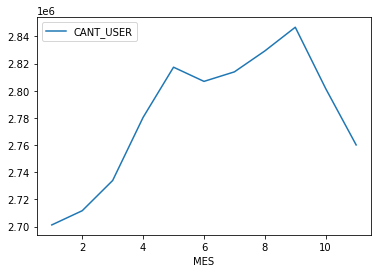

In [117]:
data_final[['MES','CANT_USER']].groupby('MES').sum().plot()

In [118]:
data_final[['MES','CANT_USER']].groupby('MES').sum()

,CANT_USER
MES,
1,2701213
2,2711669
3,2733920
4,2780367
5,2817310
6,2806868
7,2813877
8,2829289
9,2846721


<AxesSubplot:xlabel='MES'>

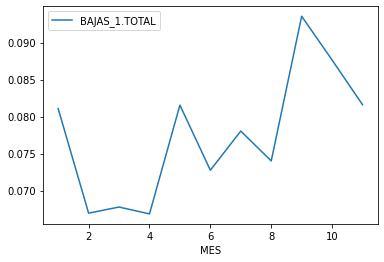

In [119]:
data_final[['MES','BAJAS_1.TOTAL']].groupby('MES').mean().plot()

In [120]:
data_final[['MES','BAJAS_1.TOTAL']].groupby('MES').mean()

,BAJAS_1.TOTAL
MES,
1,0.081076
2,0.066938
3,0.067765
4,0.066835
5,0.081541
6,0.072744
7,0.078039
8,0.073995
9,0.093559


## Filtros

In [121]:
print('Nodos: ',data_final['NODO'].nunique(), ' Registros (nodosxmes): ', len(data_final))

Nodos:  13852  Registros (nodosxmes):  150069


## Nodos con menos de 30 clientes

In [122]:
data_final[data_final['CANT_USER']<=30]['NODO'].nunique()

1391

In [123]:
data_final=data_final[data_final['CANT_USER']>30]

In [124]:
print('Nodos: ',data_final['NODO'].nunique(), ' Registros (nodosxmes): ', len(data_final))

Nodos:  12786  Registros (nodosxmes):  137837


## Meses Completos

In [125]:
data_final['NODO'].value_counts().to_frame().value_counts().sort_index()

NODO
1          64
2          19
3          33
4          35
5          17
6          65
7         156
8          82
9          64
10         64
11      12187
dtype: int64

###### Por que existen Nodos sin información en meses específicos

In [126]:
data_final=data_final.merge(data_final['NODO'].value_counts().to_frame(), left_on='NODO', right_index=True, how='left')

In [127]:
data_final.rename(columns={'NODO_x':'NODO', 'NODO_y':'num_meses'}, inplace=True)
#data_final.drop(columns=['NODO_y'],inplace=True)
data_final

,MES,NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,CANT_USER,ALFA_tarifa,ALFA,...,BAJAS_28.@,BAJAS_29.@_CHURN_TEMPRANO,BAJAS_30.@_CHURN_7_24,BAJAS_31.@_VOL,BAJAS_32.@_INVOL,BAJAS_33.@_VOL_CHURN_TEMPRANO,BAJAS_34.@_INVOL_CHURN_TEMPRANO,BAJAS_35.@_VOL_CHURN_7_24,BAJAS_36.@_INVOL_CHURN_7_24,num_meses
2,11,B1Z,REGION OCCIDENTE,CALI,CALI CENTRO,CALI,CALI CENTRO DISTRITO 6,122,0.932595,0.842765,...,0.049180,0.008197,0.016393,0.016393,0.032787,0.000000,0.008197,0.000000,0.016393,11
3,7,RO4,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3,202,0.933644,1.727396,...,0.019802,0.000000,0.000000,0.004950,0.014851,0.000000,0.000000,0.000000,0.000000,11
4,4,FI1,REGION NOROCCIDENTE,EJE CAFETERO,CALDAS,MANIZALES,MANIZALES CALDAS6,43,1.146592,0.875810,...,0.023256,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,11
5,7,KRI,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO NORTE,190,1.083396,0.999382,...,0.036842,0.005263,0.010526,0.010526,0.026316,0.000000,0.005263,0.000000,0.010526,11
6,8,HRR,REGION COSTA,COSTA NORTE,MAGDALENA-GUAJIRA,SANTA MARTA,MAGDALENA 3,212,NaN,1.005674,...,0.070755,0.042453,0.018868,0.014151,0.056604,0.000000,0.042453,0.009434,0.009434,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150063,8,SNT,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,63,1.082974,1.919266,...,0.015873,0.015873,0.000000,0.015873,0.000000,0.015873,0.000000,0.000000,0.000000,11
150064,7,5AJ023,REGION CENTRO,BOGOTA NORTE,SAN CRISTOBAL,BOGOTA,ORQUIDEAS,58,0.680535,1.059040,...,0.017241,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,11
150065,5,LVP,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,SABANETA,METROPOLITANA SABANETA,346,NaN,1.158860,...,0.023121,0.005780,0.000000,0.020231,0.002890,0.002890,0.002890,0.000000,0.000000,11
150066,5,E3Z,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO FUNDADORES,149,NaN,0.812371,...,0.026846,0.000000,0.006711,0.013423,0.013423,0.000000,0.000000,0.000000,0.006711,11


In [128]:
data_final=data_final[data_final['num_meses']==11]

In [129]:
print('Nodos: ',data_final['NODO'].nunique(), ' Registros (nodosxmes): ', len(data_final))

Nodos:  12187  Registros (nodosxmes):  134057


### Nodos con información incompleta
* 3 meses o más sin información
* Nodos con 2 o menos meses son interpolados

In [130]:
data_final[['NODO','MES']+sel_variables_causas2].isnull().sum()

NODO                     0
MES                      0
ALFA_tarifa          58183
ALFA                 22473
BETA                 10392
MEGA                 18100
Llamadas_3M              0
Llamadas_Admin_3M        0
Llamadas_Tecn_3M         0
PENETRACION            149
OCUPACION_DW          3140
dtype: int64

In [131]:
data_final[['NODO','MES']+sel_variables_causas2].isnull().sum()/len(data_final)

NODO                 0.000000
MES                  0.000000
ALFA_tarifa          0.434017
ALFA                 0.167638
BETA                 0.077519
MEGA                 0.135017
Llamadas_3M          0.000000
Llamadas_Admin_3M    0.000000
Llamadas_Tecn_3M     0.000000
PENETRACION          0.001111
OCUPACION_DW         0.023423
dtype: float64

In [132]:
data_final[sel_variables_causas2]=data_final[sel_variables_causas2].fillna(value=-100)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [133]:
data_final

,MES,NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,CANT_USER,ALFA_tarifa,ALFA,...,BAJAS_28.@,BAJAS_29.@_CHURN_TEMPRANO,BAJAS_30.@_CHURN_7_24,BAJAS_31.@_VOL,BAJAS_32.@_INVOL,BAJAS_33.@_VOL_CHURN_TEMPRANO,BAJAS_34.@_INVOL_CHURN_TEMPRANO,BAJAS_35.@_VOL_CHURN_7_24,BAJAS_36.@_INVOL_CHURN_7_24,num_meses
2,11,B1Z,REGION OCCIDENTE,CALI,CALI CENTRO,CALI,CALI CENTRO DISTRITO 6,122,0.932595,0.842765,...,0.049180,0.008197,0.016393,0.016393,0.032787,0.000000,0.008197,0.000000,0.016393,11
3,7,RO4,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3,202,0.933644,1.727396,...,0.019802,0.000000,0.000000,0.004950,0.014851,0.000000,0.000000,0.000000,0.000000,11
4,4,FI1,REGION NOROCCIDENTE,EJE CAFETERO,CALDAS,MANIZALES,MANIZALES CALDAS6,43,1.146592,0.875810,...,0.023256,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,11
5,7,KRI,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO NORTE,190,1.083396,0.999382,...,0.036842,0.005263,0.010526,0.010526,0.026316,0.000000,0.005263,0.000000,0.010526,11
6,8,HRR,REGION COSTA,COSTA NORTE,MAGDALENA-GUAJIRA,SANTA MARTA,MAGDALENA 3,212,-100.000000,1.005674,...,0.070755,0.042453,0.018868,0.014151,0.056604,0.000000,0.042453,0.009434,0.009434,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150063,8,SNT,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,63,1.082974,1.919266,...,0.015873,0.015873,0.000000,0.015873,0.000000,0.015873,0.000000,0.000000,0.000000,11
150064,7,5AJ023,REGION CENTRO,BOGOTA NORTE,SAN CRISTOBAL,BOGOTA,ORQUIDEAS,58,0.680535,1.059040,...,0.017241,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,11
150065,5,LVP,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,SABANETA,METROPOLITANA SABANETA,346,-100.000000,1.158860,...,0.023121,0.005780,0.000000,0.020231,0.002890,0.002890,0.002890,0.000000,0.000000,11
150066,5,E3Z,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO FUNDADORES,149,-100.000000,0.812371,...,0.026846,0.000000,0.006711,0.013423,0.013423,0.000000,0.000000,0.000000,0.006711,11


In [134]:
data_comp_pt=pd.pivot_table(data_final[['NODO','MES']+sel_variables_causas2],index='MES',columns='NODO')

In [135]:
#data_comp_pt

In [136]:
data_comp_pt=data_comp_pt.replace(-100,np.nan)

In [137]:
list_eliminar=[]
i=0
for col in sel_variables_causas2:
    print(col)
    df_aux=data_comp_pt[col].isnull().sum().to_frame()    
    df_aux=df_aux[df_aux[0]>3]
    if i==0:
        list_eliminar=list(df_aux.index)
    else :
        list_eliminar=list_eliminar+list(df_aux.index)
    print(len(list(df_aux.index)))
    i=i+1
list_eliminar = list(set(list_eliminar))

ALFA_tarifa
5874
ALFA
2442
BETA
1039
MEGA
1931
Llamadas_3M
0
Llamadas_Admin_3M
0
Llamadas_Tecn_3M
0
PENETRACION
33
OCUPACION_DW
431


In [138]:
len(list_eliminar)

6648

In [139]:
data_comp_pt=data_comp_pt.interpolate()
data_comp_pt.reset_index(inplace=True)
data_comp_un=data_comp_pt.melt(id_vars=['MES'], var_name=['varible','NODO'],value_name='valor')
data_comp=pd.pivot_table(data_comp_un,index=['NODO','MES'],columns='varible')
data_comp.columns = data_comp.columns.droplevel()
data_comp.reset_index(inplace=True)

In [140]:
data_comp

varible,NODO,MES,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
0,01S,1,0.420691,NaN,0.824528,2.402516,1.823899,0.503145,0.510220,0.395358,0.250360
1,01S,2,0.585591,NaN,1.455621,2.331288,1.631902,0.619632,0.402296,0.402865,0.251788
2,01S,3,0.211445,0.875348,0.591549,2.593750,1.806250,0.712500,0.357443,0.347061,0.257746
3,01S,4,0.458695,0.871263,0.587002,2.245509,1.706587,0.485030,0.781421,0.401564,0.257703
4,01S,5,0.409383,1.209064,1.217604,2.228070,1.672515,0.520468,0.336220,0.373240,0.259777
...,...,...,...,...,...,...,...,...,...,...,...
134052,ZVZ,7,1.282257,NaN,1.279740,1.572727,1.090909,0.438636,1.001967,0.517829,0.358321
134053,ZVZ,8,1.492830,NaN,1.481245,1.697517,1.144470,0.503386,1.007821,0.515619,0.358321
134054,ZVZ,9,1.604062,NaN,1.639118,1.681614,1.163677,0.470852,0.978613,0.466552,0.354790
134055,ZVZ,10,0.583469,NaN,1.106707,1.689888,1.141573,0.498876,0.527211,0.489459,0.362481


In [141]:
data_final=data_final.drop(columns=sel_variables_causas2).merge(data_comp,left_on=['NODO','MES'],right_on=['NODO','MES'])

In [142]:
data_final[data_final['NODO']=='0BV']

,MES,NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,...,num_meses,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1880,3,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,75,0.000000,0.0,...,11,0.601799,NaN,1.204769,1.773333,1.173333,0.520000,0.499514,0.254218,0.430851
8604,9,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,69,0.000000,0.0,...,11,1.966472,NaN,1.584615,1.333333,1.086957,0.217391,1.240978,0.260206,0.403226
19728,5,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,77,0.090909,0.0,...,11,0.996145,NaN,0.949843,1.870130,1.064935,0.714286,1.048746,0.287624,0.409574
50561,7,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,73,0.082192,0.0,...,11,8.576090,NaN,7.214286,1.602740,0.931507,0.643836,1.188765,0.243077,0.404255
54677,4,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,76,0.013158,0.0,...,11,0.906282,NaN,1.070588,1.973684,1.289474,0.605263,0.846527,0.295810,0.409574
62656,8,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,71,0.070423,0.0,...,11,1.152957,NaN,0.835135,1.577465,1.154930,0.408451,1.380564,0.251533,0.408602
62737,1,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,75,0.013333,0.0,...,11,3.765163,NaN,2.173913,1.560000,1.133333,0.346667,1.731975,0.232187,0.430108
64956,2,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,76,0.039474,0.0,...,11,2.243749,NaN,2.151515,1.684211,1.263158,0.342105,1.042869,0.252174,0.420213
89926,10,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,69,0.043478,0.0,...,11,0.946351,NaN,1.090909,1.333333,1.000000,0.275362,0.867489,0.244678,0.401070
114303,6,0BV,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,LOS PATIOS,DISTRITO LOS PATIOS,72,0.000000,0.0,...,11,6.019614,NaN,4.039216,2.013889,1.180556,0.791667,1.490293,0.278726,0.404255


In [143]:
### Eliminar Nodos con mayores imputaciones
data_final=data_final[~data_final['NODO'].isin(list_eliminar)]

In [144]:
print('Nodos: ',data_final['NODO'].nunique(), ' Registros (nodosxmes): ', len(data_final))

Nodos:  5539  Registros (nodosxmes):  60929


## Validacion de Outliers

In [145]:
data_final[sel_variables_causas2].describe()

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
count,60233.000000,60775.000000,60878.000000,60826.000000,60929.000000,60929.000000,60929.000000,60929.000000,60905.000000
mean,0.966820,1.498470,1.394076,1.079636,2.269166,1.464266,0.637591,0.370667,0.498493
std,0.204196,2.031689,1.403213,0.685414,4.525669,0.612242,0.296042,0.166672,0.158022
min,0.367525,0.000000,0.100062,0.000000,0.772727,0.446970,0.085366,0.088575,0.000000
25%,0.820143,0.632764,0.909807,0.583233,1.727273,1.175652,0.447514,0.294695,0.383539
50%,0.947629,1.177015,1.186849,0.980769,2.057252,1.398760,0.571101,0.352328,0.493148
75%,1.085775,1.914116,1.568966,1.451451,2.460000,1.666667,0.747423,0.424861,0.606553
max,2.567901,166.592969,100.000000,13.884362,309.462094,36.797153,4.534884,28.500000,1.033627


In [146]:
#outliers=data_final[sel_variables_causas2].quantile(0.995)
#outliers

In [147]:
outliers=data_final[sel_variables_causas2].quantile(0.99)
outliers

ALFA_tarifa          1.514600
ALFA                 6.379498
BETA                 4.668185
MEGA                 3.176927
Llamadas_3M          4.313906
Llamadas_Admin_3M    2.702122
Llamadas_Tecn_3M     1.702729
PENETRACION          0.689274
OCUPACION_DW         0.880359
Name: 0.99, dtype: float64

In [148]:
#outliers=data_final[sel_variables_causas2].quantile(0.98)
#outliers

In [149]:
outliers['ALFA']

6.379497840705341

### Identificacion y eliminación de Nodos con Outliers
* Se interpolan valores outliers

In [150]:
data_finalV2=data_final.copy()

In [151]:
for col in sel_variables_causas2:     
    data_finalV2['val_'+col]=np.where(data_finalV2[col]>outliers[col],1,0)

In [152]:
data_finalV2

,MES,NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,...,PENETRACION,val_ALFA_tarifa,val_ALFA,val_BETA,val_MEGA,val_Llamadas_3M,val_Llamadas_Admin_3M,val_Llamadas_Tecn_3M,val_PENETRACION,val_OCUPACION_DW
1,7,RO4,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3,202,0.049505,0.000000,...,0.315232,0,0,0,0,0,0,0,0,0
3,7,KRI,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO NORTE,190,0.110526,0.015789,...,0.282192,0,0,0,0,0,0,0,0,0
7,3,5B6022,REGION CENTRO,BOGOTA NORTE,SAN CRISTOBAL,BOGOTA,ORQUIDEAS,406,0.098522,0.007389,...,0.460626,0,0,0,0,0,0,0,0,0
9,1,VED2D,REGION CENTRO,BOGOTA ORIENTE,RESTREPO,BOGOTA,CIUDAD JARDIN,88,0.068182,0.000000,...,0.381323,0,0,0,0,0,0,0,0,0
10,7,GIA,REGION CENTRO,BOGOTA ORIENTE,USME,BOGOTA,LA VICTORIA,158,0.113924,0.056962,...,0.273700,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134044,3,TTB,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN OCCIDENTAL,MEDELLIN,MEDELLIN GRAN ROBLEDO SUR,182,0.087912,0.016484,...,0.295522,0,0,0,0,0,0,0,0,0
134048,3,MNT,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 2,300,0.133333,0.056667,...,0.276527,0,0,0,0,0,0,0,0,0
134049,11,ACB,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,75,0.080000,0.000000,...,0.326693,0,0,0,0,0,0,0,0,0
134055,5,E3Z,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO FUNDADORES,149,0.060403,0.000000,...,0.195652,0,0,0,0,0,0,0,0,0


In [153]:
#data_finalV2.filter('val_.*')
data_finalV2.filter(regex=("val_.*")).sum()

val_ALFA_tarifa          603
val_ALFA                 608
val_BETA                 609
val_MEGA                 609
val_Llamadas_3M          610
val_Llamadas_Admin_3M    610
val_Llamadas_Tecn_3M     610
val_PENETRACION          610
val_OCUPACION_DW         610
dtype: int64

In [154]:
colums_validacion=list(data_finalV2.filter(regex=("val_.*")).columns)
colums_validacion

['val_ALFA_tarifa',
 'val_ALFA',
 'val_BETA',
 'val_MEGA',
 'val_Llamadas_3M',
 'val_Llamadas_Admin_3M',
 'val_Llamadas_Tecn_3M',
 'val_PENETRACION',
 'val_OCUPACION_DW']

In [155]:
res=data_finalV2.groupby('NODO')[colums_validacion].max()

In [156]:
res['val']=res.max(axis=1)

In [157]:
res

,val_ALFA_tarifa,val_ALFA,val_BETA,val_MEGA,val_Llamadas_3M,val_Llamadas_Admin_3M,val_Llamadas_Tecn_3M,val_PENETRACION,val_OCUPACION_DW,val
NODO,,,,,,,,,,
02S,0,0,1,0,0,1,0,0,0,1
0AR,0,0,0,0,0,0,0,0,0,0
0BZ,0,0,0,0,0,0,0,0,0,0
0CO,0,0,0,0,0,0,0,0,0,0
0CP,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
ZT3,0,0,0,0,0,0,0,0,0,0
ZUL,1,0,0,1,0,0,0,0,0,1
ZVD,0,0,0,0,0,0,0,0,0,0


In [158]:
res.sum()

val_ALFA_tarifa           178
val_ALFA                  479
val_BETA                  484
val_MEGA                  462
val_Llamadas_3M           275
val_Llamadas_Admin_3M     296
val_Llamadas_Tecn_3M      293
val_PENETRACION           115
val_OCUPACION_DW          285
val                      1819
dtype: int64

In [159]:
data_final=data_final[data_final['NODO'].isin(res[res['val']==0].index)]

In [160]:
print('Nodos: ',data_final['NODO'].nunique(), ' Registros (nodosxmes): ', len(data_final))

Nodos:  3720  Registros (nodosxmes):  40920


In [161]:
data_final[sel_variables_causas2].describe()

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
count,40460.000000,40854.000000,40900.000000,40873.000000,40920.000000,40920.000000,40920.000000,40920.000000,40905.000000
mean,0.959862,1.327170,1.300539,1.027683,2.084167,1.413268,0.607031,0.361464,0.492774
std,0.189934,0.952965,0.577798,0.591396,0.522468,0.349927,0.233454,0.095480,0.146034
min,0.415299,0.000000,0.139640,0.000000,0.810591,0.507692,0.085366,0.118538,0.000000
25%,0.819878,0.621516,0.916020,0.574017,1.710430,1.161826,0.444721,0.292254,0.385401
50%,0.945336,1.129837,1.185031,0.952348,2.020168,1.377182,0.559140,0.347161,0.490298
75%,1.081372,1.803862,1.539098,1.399959,2.390311,1.625000,0.716814,0.414185,0.598192
max,1.514445,6.372842,4.666667,3.175737,4.284211,2.701754,1.700787,0.688474,0.879946


 ### Cantidad Final de usuarios y Bajas

<AxesSubplot:xlabel='MES'>

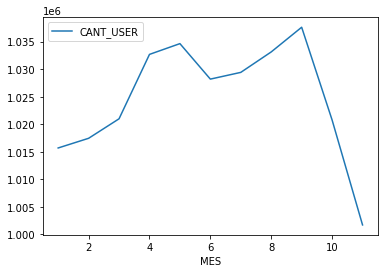

In [162]:
data_final[['MES','CANT_USER']].groupby('MES').sum().plot()

In [163]:
data_final[['MES','CANT_USER']].groupby('MES').sum()

,CANT_USER
MES,
1,1015677
2,1017434
3,1020978
4,1032682
5,1034639
6,1028190
7,1029413
8,1033131
9,1037616


<AxesSubplot:xlabel='MES'>

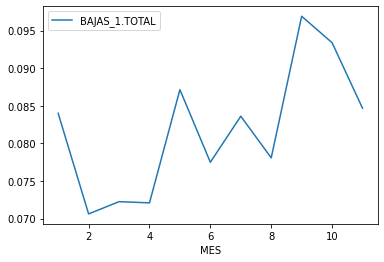

In [164]:
data_final[['MES','BAJAS_1.TOTAL']].groupby('MES').mean().plot()

In [165]:
data_final[['MES','BAJAS_1.TOTAL']].groupby('MES').mean()

,BAJAS_1.TOTAL
MES,
1,0.084001
2,0.070617
3,0.072247
4,0.072088
5,0.087146
6,0.077488
7,0.083613
8,0.078076
9,0.096912


In [166]:
data_final

,MES,NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,...,num_meses,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,7,RO4,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3,202,0.049505,0.000000,...,11,1.727396,0.933644,1.326693,2.094059,1.282178,0.712871,1.302031,0.615423,0.315232
3,7,KRI,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO NORTE,190,0.110526,0.015789,...,11,0.999382,1.083396,1.492891,1.589474,1.163158,0.378947,0.669427,0.316391,0.282192
7,3,5B6022,REGION CENTRO,BOGOTA NORTE,SAN CRISTOBAL,BOGOTA,ORQUIDEAS,406,0.098522,0.007389,...,11,1.734991,0.929226,0.811159,2.423645,1.517241,0.847291,2.138904,0.394903,0.460626
10,7,GIA,REGION CENTRO,BOGOTA ORIENTE,USME,BOGOTA,LA VICTORIA,158,0.113924,0.056962,...,11,0.237904,0.951179,1.350877,2.088608,1.563291,0.474684,0.176111,0.349562,0.273700
14,11,CLD,REGION CENTRO,BOGOTA OCCIDENTE,PORVENIR,BOGOTA,PATIO BONITO,535,0.087850,0.005607,...,11,1.058871,0.936050,1.063762,1.880374,1.338318,0.476636,0.995402,0.516933,0.495163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134039,11,S04,REGION CENTRO,BOGOTA NORTE,MAZUREN,BOGOTA,SUBA RINCON,293,0.078498,0.006826,...,11,2.829698,0.967452,1.602996,1.863481,1.365188,0.450512,1.765255,0.296150,0.345745
134042,3,LOM2,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,CUCUTA,DISTRITO CUCUTA 4,209,0.057416,0.014354,...,11,0.595137,1.212922,1.392491,1.870813,1.210526,0.612440,0.427390,0.693385,0.308657
134043,4,472D,REGION CENTRO,BOGOTA SUR,ALSACIA,BOGOTA,HAYUELOS,196,0.061224,0.000000,...,11,1.663275,0.916299,0.816349,2.056122,1.311224,0.688776,2.037455,0.388049,0.523227
134049,11,ACB,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,75,0.080000,0.000000,...,11,2.502725,0.675725,2.837209,1.333333,0.893333,0.373333,0.882108,0.476416,0.326693


In [167]:
data_final.shape

(40920, 54)

In [168]:
data_final['MES'].nunique()

11

In [169]:
data_final.drop(columns=['num_meses'],inplace=True)

In [170]:
data_final.to_csv('../NODOS_FILTRADOS_todos_ajuste_llamadas.csv',sep=';',index=False)